# Olive Tree Disease Classification

---

### 1. Introduction

Olive trees can be affected by a number of diseases that can be identified in various ways, most of which involve a lot of effort and specilization. 

### 2. Literature Review

### 3. Methodology

**3.1. Dataset**

For this project I have used a public dataset to build a model that can detect various diseases in Olive leaves. The dataset consists of over 3,400 
images of olive leaves collected from Denizli City, Turkey. The images are classified into the following classes:  

- Olive Leaves infected with Aculus Olearius.
- Olive Leaves infected with Peacock Spot.
- Healthy Olive Leaves.


---

### 4. Data Analysis 

We can now start with the analysis 

**SETUP**

We will start off by importing some libraries we'll be using in this analysis such as Pandas, Numpy, and Seaborn. Next, load the dataset into the notebook script by pasting the dataset's file path as seen below.

In [30]:
# Import relevant packages

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from scipy.misc import face
from random import randint
from sklearn.datasets import fetch_openml
from PIL import Image
from skimage import io, img_as_float, img_as_ubyte
from skimage.io import imread, imshow
import cv2
import os
from glob import glob

Next, load the dataset into the notebook script by pasting the dataset's file path as seen below. As you can see, there are three classes of photos in our dataset based on the three states that an olive leaf can be: healthy,infected with aculus_olearius, or infected 

In [31]:
dir = '/Users/raghadibrahim/Desktop/olive_disease_detection/dataset/'
healthy_dir = os.path.join(dir, 'healthy')
aculus_olearius_dir = os.path.join(dir, 'aculus_olearius')
peacock_disease_dir = os.path.join(dir, 'peacock_disease')

healthy_data = os.listdir(dir + 'healthy/')
aculus_olearius_data = os.listdir(dir + 'aculus_olearius/')
peacock_disease_data = os.listdir(dir + 'peacock_disease/')

In [56]:
healthy_data[:10]

['B-629.jpg',
 'B463.JPG',
 'IMG_20190807_144220.jpg',
 'B-601.jpg',
 'B-167.JPG',
 'A624.JPG',
 'B-173.JPG',
 'B-615.jpg',
 'B-198.JPG',
 'B-49.JPG']

Now that the dataset has been successfully loaded from the corresponding directories, we can proceed with the analysis. 

**4.1. A First Look At The Data**

We can start off by taking a look at the data we are working with. Since the dataset constitutes of thousands images for each of the three states of an olive leaf (well in this dataset and not ever). that we are trying to detect: a healthy leaf, a leaf infected with Aculus Olearius, and a leaf infected with Peacock Spot Disease. 

To do this, we will display a small sample of each class to get an idea of the images in that group. ThiSome questionsThis can be done through examine a random sample of the images from each of the three classes, starting with the healthy leaves followed by leaves infected with Aculus olearius disease and finally leaves infected with peacock spot disease.

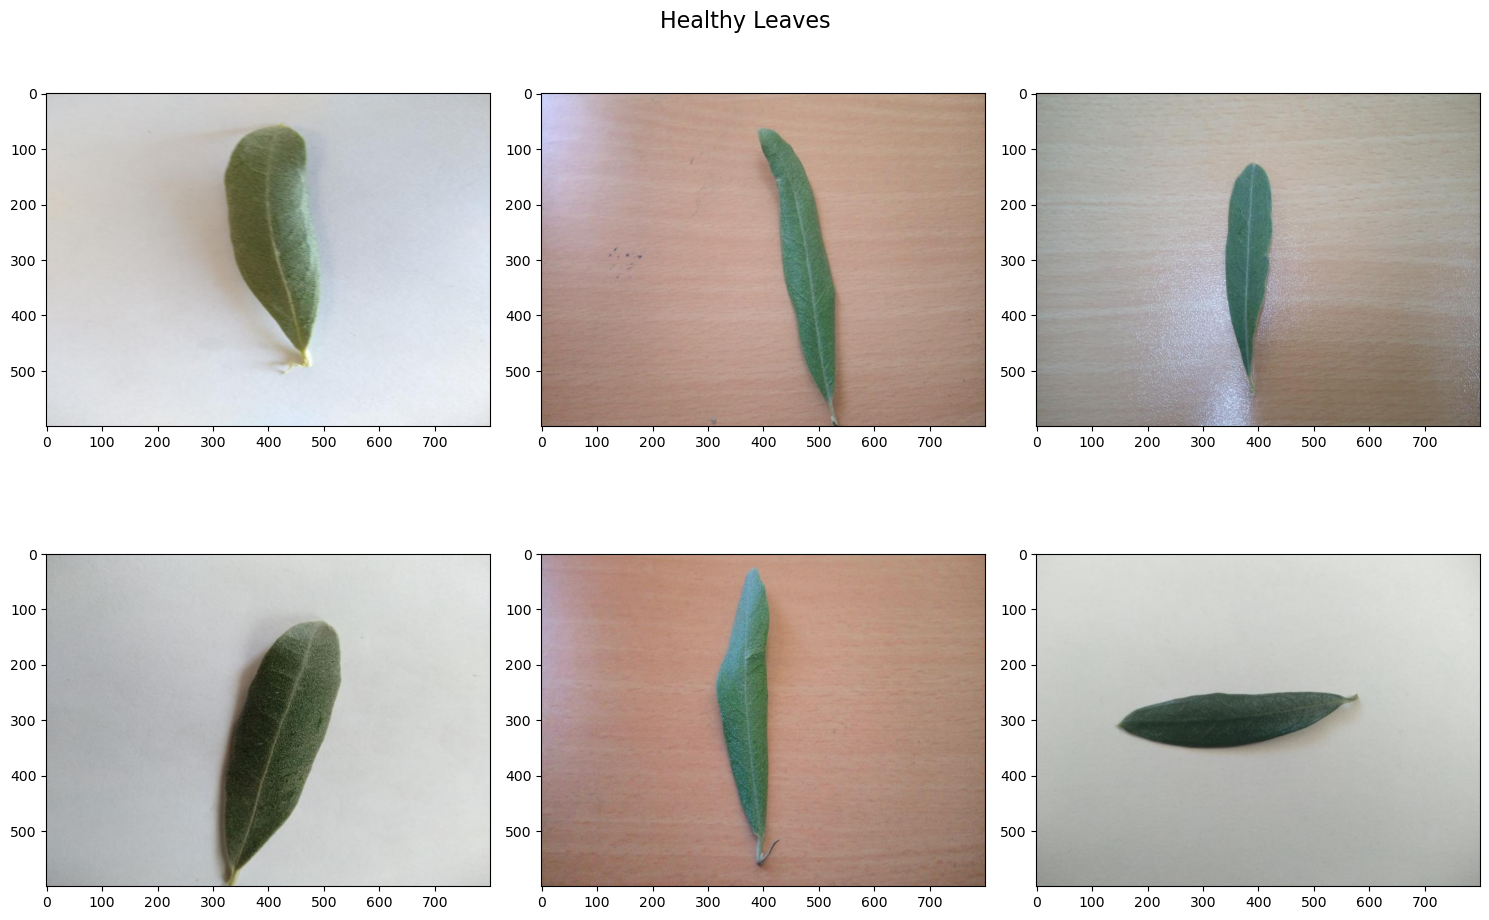

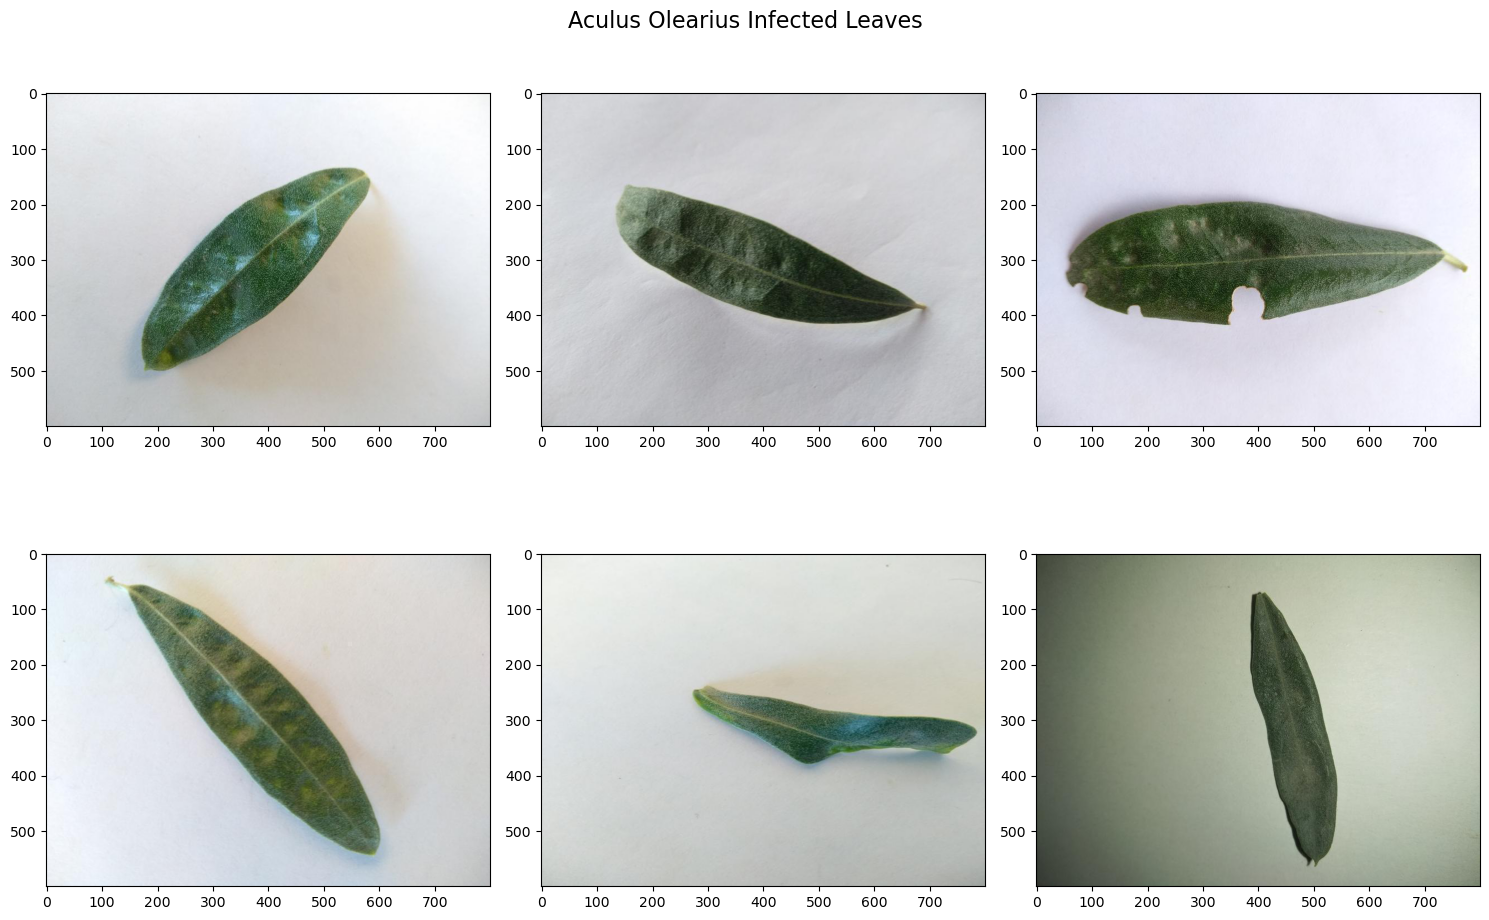

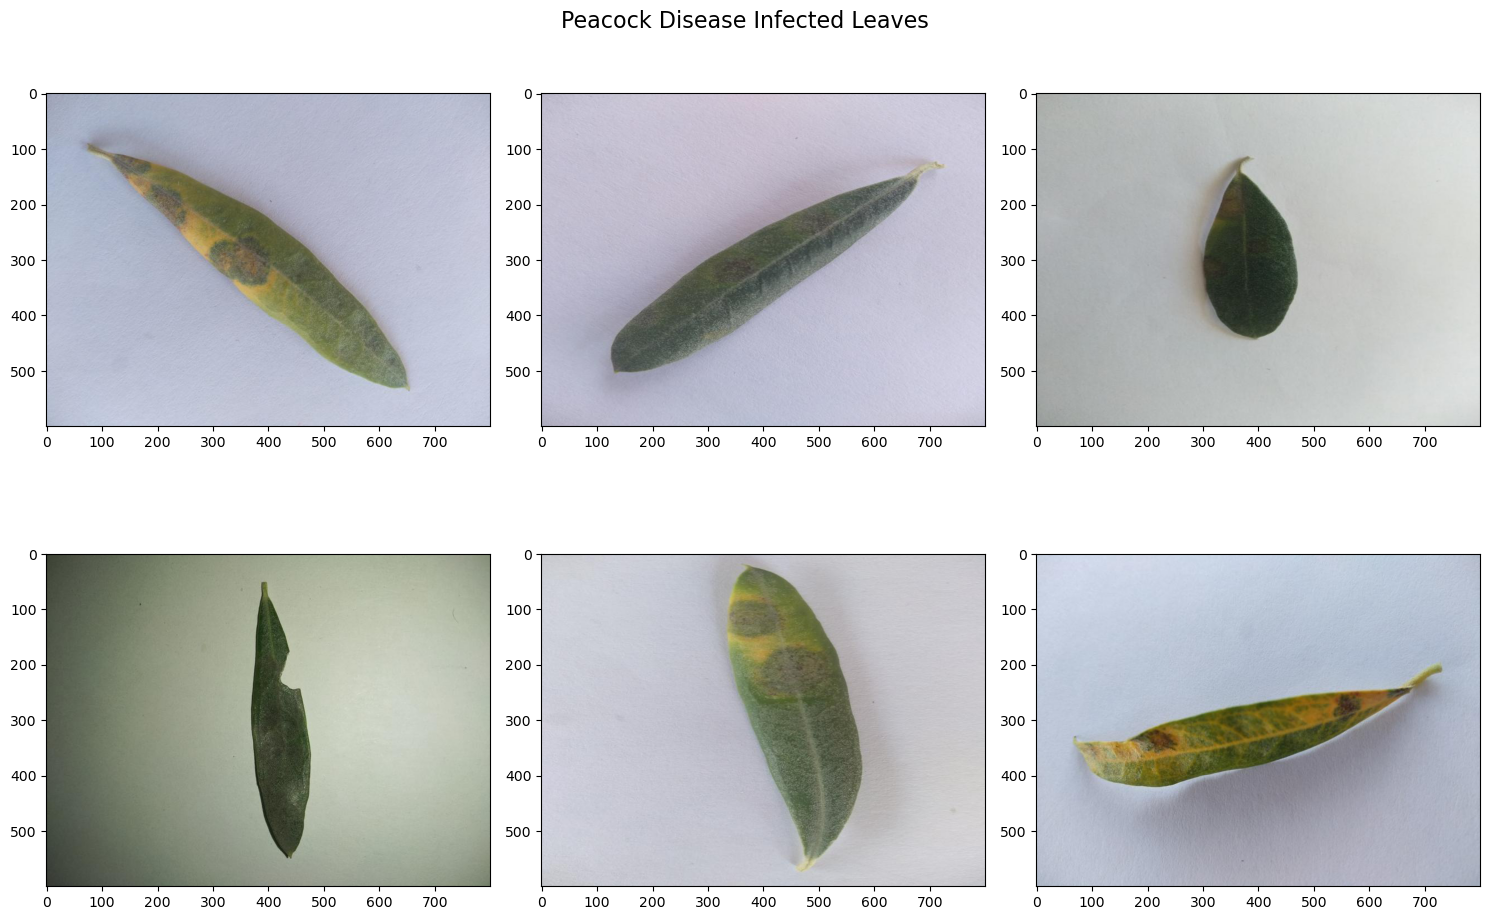

In [53]:
#####################################
######### HEALTHY #########

# Select 6 random images from directory
healthy_sample = np.random.choice(healthy_data, 6, replace=False)

# Set up a subplot grid that is 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < len(healthy_sample):
        
        # Read the image
        img_path = os.path.join(dir, 'healthy', healthy_sample[i])
        image = Image.open(img_path)
        num = np.asarray(image)

        # Plot the image
        ax.imshow(image)


plt.tight_layout()
fig.suptitle("Healthy Leaves", fontsize=16)  # Set title for the entire figure
plt.show()

#####################################

######### ACULUS OLEARIUS #########

# Select 6 random images from your directory
aculus_olearius_sample = np.random.choice(aculus_olearius_data, 6, replace=False)

# Set up a subplot grid that is 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < len(aculus_olearius_sample):
        
        # Read the image
        img_path = os.path.join(dir, 'aculus_olearius', aculus_olearius_sample[i])
        image = Image.open(img_path)
        num = np.asarray(image)    
        
        # Plot the image
        ax.imshow(image)

plt.tight_layout()
fig.suptitle("Aculus Olearius Infected Leaves", fontsize=16)  # Set title for the entire figure
plt.show()

#####################################

######### PEACOCK DISEASE #########

# Select 6 random images from your directory
peacock_disease_sample = np.random.choice(peacock_disease_data, 6, replace=False)

# Set up a subplot grid that is 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < len(peacock_disease_sample):
        # Read the image
        img_path = os.path.join(dir, 'peacock_disease', peacock_disease_sample[i])
        image = Image.open(img_path)
        num = np.asarray(image)

        # Plot the image
        ax.imshow(image)

plt.tight_layout()
fig.suptitle("Peacock Disease Infected Leaves", fontsize=16)  # Set title for the entire figure
plt.show()

Above we ca

---

### 2. Exploratory Data Analysis (EDA) 

**2.1. Data Preprocessing**

In [57]:
img_path = os.path.join(dir, 'healthy', healthy_sample[i])

In [58]:
img_path

'/Users/raghadibrahim/Desktop/olive_disease_detection/dataset/healthy/IMG_20190729_170416.jpg'

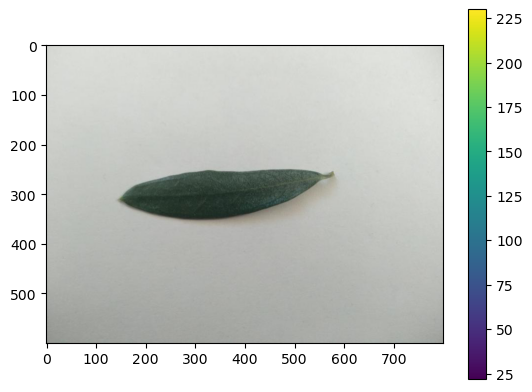

In [59]:
imim = mpimg.imread(img_path)
plt.imshow(imim)
plt.colorbar()

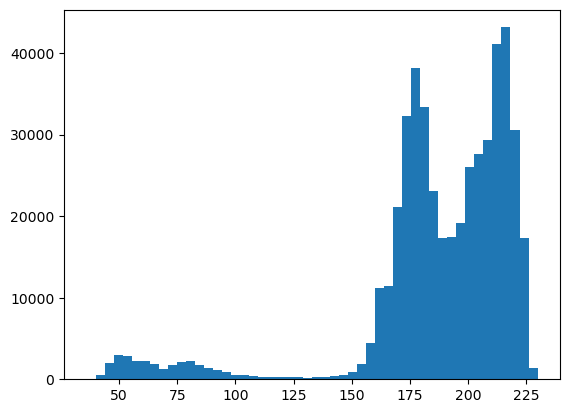

In [84]:
counts, bins, _ = plt.hist(imim[:,:,1].ravel(), bins=50)
# plt.show()

In [85]:
counts

array([1.2000e+01, 4.8300e+02, 1.9580e+03, 2.9950e+03, 2.8930e+03,
       2.2280e+03, 2.1870e+03, 1.9030e+03, 1.2990e+03, 1.7700e+03,
       2.1160e+03, 2.1810e+03, 1.8060e+03, 1.3530e+03, 1.1660e+03,
       8.9600e+02, 4.7100e+02, 5.1800e+02, 3.6800e+02, 3.2800e+02,
       2.7400e+02, 2.3400e+02, 2.5700e+02, 2.6400e+02, 2.0100e+02,
       3.1800e+02, 3.0500e+02, 4.1400e+02, 5.4200e+02, 9.1800e+02,
       1.9280e+03, 4.4450e+03, 1.1135e+04, 1.1439e+04, 2.1119e+04,
       3.2289e+04, 3.8135e+04, 3.3353e+04, 2.3121e+04, 1.7344e+04,
       1.7489e+04, 1.9103e+04, 2.6049e+04, 2.7601e+04, 2.9328e+04,
       4.1074e+04, 4.3148e+04, 3.0536e+04, 1.7299e+04, 1.4070e+03])

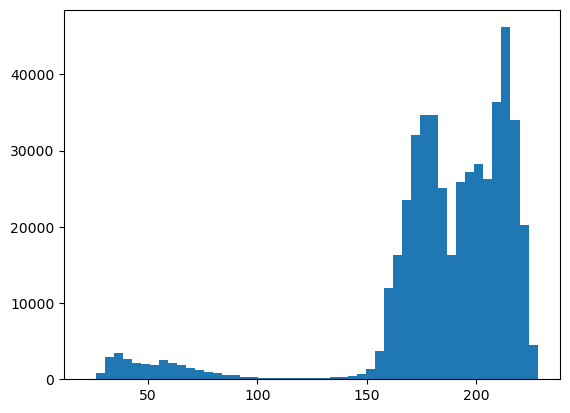

In [67]:
plt.hist(imim[:,:,0].ravel(), bins=50)
plt.show()

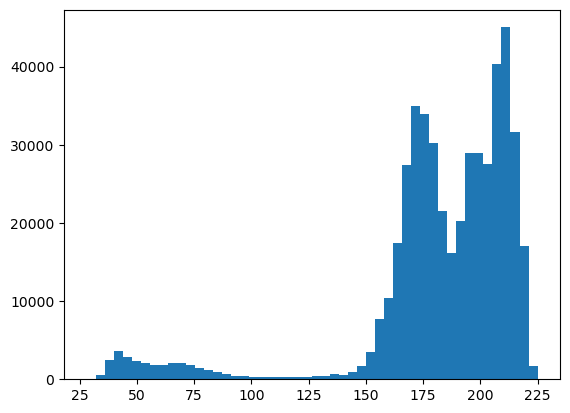

In [68]:
plt.hist(imim[:,:,2].ravel(), bins=50)
plt.show()

In [65]:
imim.shape

(600, 800, 3)

In [66]:
# second color channel
imim[:,:,1].shape

(600, 800)

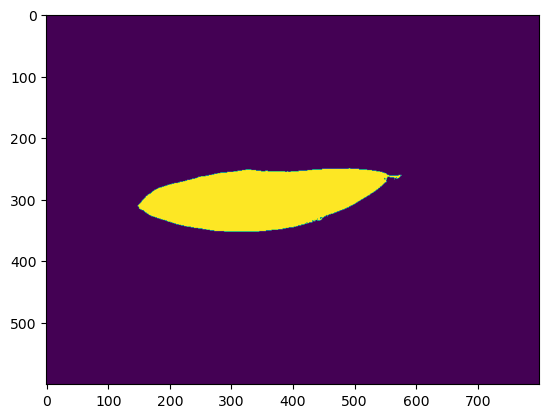

In [70]:
plt.imshow(imim[:,:,1] < 125)

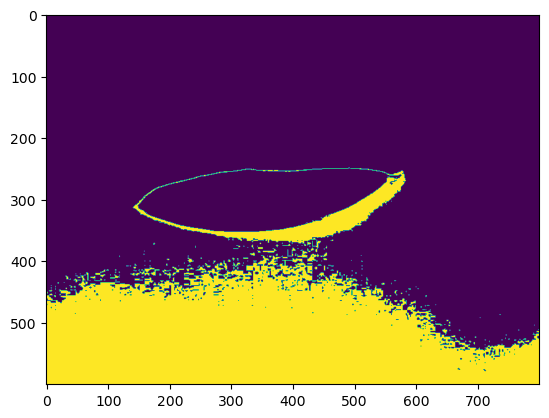

In [73]:
plt.imshow((125 < imim[:,:,1]) & (imim[:,:,1] < 180))

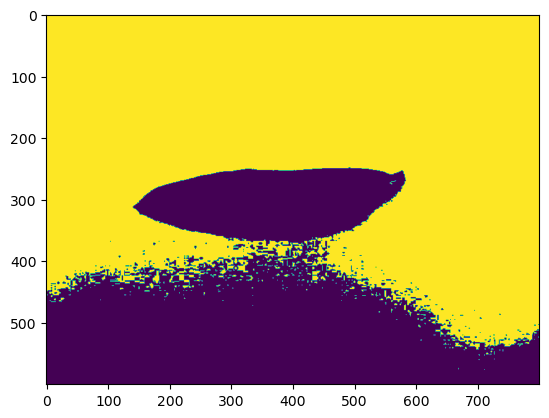

In [75]:
plt.imshow((imim[:,:,1] > 180))

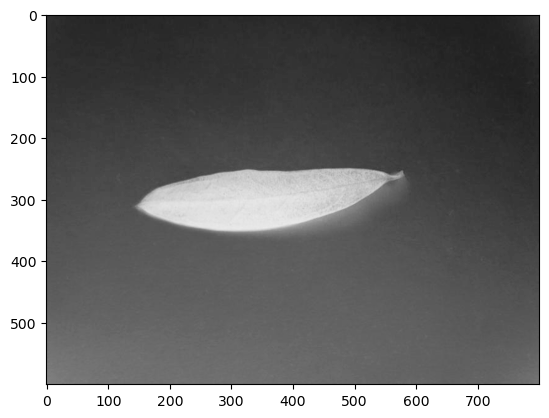

In [60]:
#plt.hist(imim[:,:,2].ravel(), bins=50)
plt.imshow(imim[:,:,1], cmap = 'Greys', vmin=0, vmax=255)
plt.show()

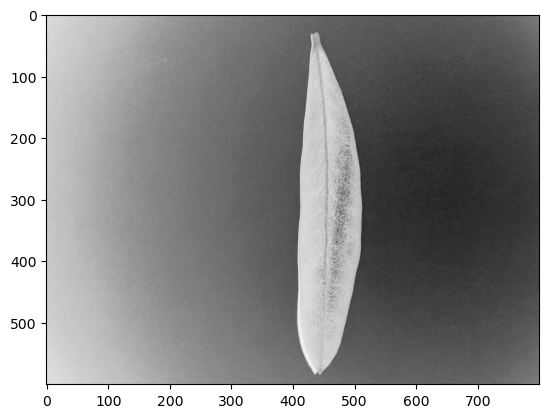

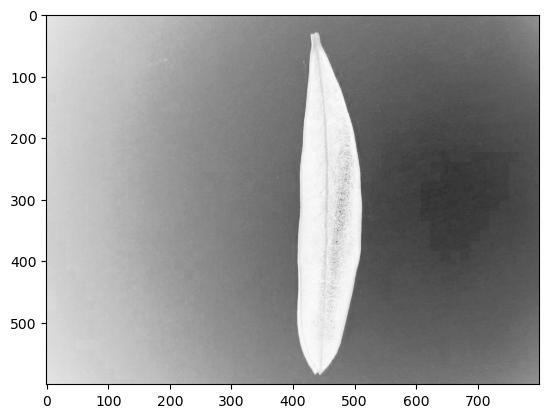

In [31]:
plt.imshow(imim[:,:,2], cmap = 'Greys', vmin=0, vmax=255)